In [5]:
print("Data Science is the best")

Data Science is the best


In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
df=pd.read_csv('../data/2526-FIM-TEQ/scouted_data.tsv',sep='\t')
position = df["End Position(Endgame)"]
df["Auto Points Scored"] = df["Classifier Scored(Auto)"]*3 + df["Overflow Scored(Auto)"]*1 + df["Pattern Correct(Auto)"]*2
df["Teleop Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Depot Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Endgame Points Scored"] = np.where(position == "No", 0, np.where(position == "P", 5, np.where(position == "Sc", 10, np.where(position == "Hh", 20, 0))))
df["Total Points Scored"] = df["Auto Points Scored"] + df["Teleop Points Scored"] + df["Endgame Points Scored"]
df["Shooting Points Scored"] = df["Classifier Scored(Teleop)"]*3 + df["Overflow Scored(Teleop)"]*1 + df["Pattern Correct(Teleop)"]*2
df["Classifier Points Scored(Auto)"] = df["Classifier Scored(Auto)"]*3
df["Overflow Points Scored(Auto)"] = df["Overflow Scored(Auto)"]*1
print(df)

    Scouter Initials                     Match Number Robot  Team Number  \
0                abc                          Quals 1    R1        15206   
1                abc                          Quals 1    R2        27153   
2                abc                          Quals 1    B1        25912   
3                abc                          Quals 1    B2        16523   
4                abc                          Quals 2    R1         5237   
..               ...                              ...   ...          ...   
215              abc   Lower Bracket  Round 5 Match 9    B2        20511   
216              abc  Final Bracket  Round 6 Match 10    R1         5237   
217              abc  Final Bracket  Round 6 Match 10    R2        15465   
218              abc  Final Bracket  Round 6 Match 10    B1        14790   
219              abc  Final Bracket  Round 6 Match 10    B2         7085   

     No Show  Moved?  Classifier Scored(Auto)  Overflow Scored(Auto)  \
0      False   

In [16]:
df.columns

Index(['Scouter Initials', 'Match Number', 'Robot', 'Team Number', 'No Show',
       'Moved?', 'Classifier Scored(Auto)', 'Overflow Scored(Auto)',
       'Pattern Correct(Auto)', 'Classifier Scored(Teleop)',
       'Overflow Scored(Teleop)', 'Depot Scored(Teleop)',
       'Pattern Correct(Teleop)', 'End Position(Endgame)',
       'Auto Points Scored', 'Teleop Points Scored', 'Endgame Points Scored',
       'Total Points Scored', 'Shooting Points Scored',
       'Classifier Points Scored(Auto)', 'Overflow Points Scored(Auto)'],
      dtype='object')

In [17]:
all_teams = [3333, 6666, 11111, 4444]
new_df = df.loc[df["Team Number"].isin(all_teams)]
print(new_df)

Empty DataFrame
Columns: [Scouter Initials, Match Number, Robot, Team Number, No Show, Moved?, Classifier Scored(Auto), Overflow Scored(Auto), Pattern Correct(Auto), Classifier Scored(Teleop), Overflow Scored(Teleop), Depot Scored(Teleop), Pattern Correct(Teleop), End Position(Endgame), Auto Points Scored, Teleop Points Scored, Endgame Points Scored, Total Points Scored, Shooting Points Scored, Classifier Points Scored(Auto), Overflow Points Scored(Auto)]
Index: []

[0 rows x 21 columns]


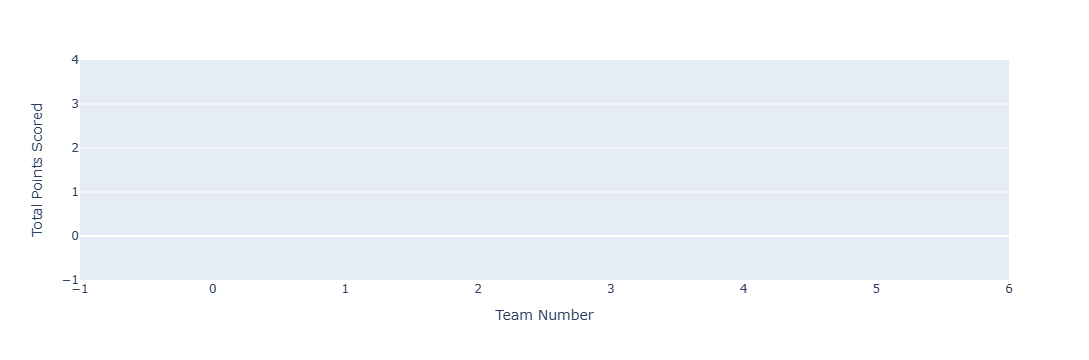

In [18]:
fig = px.box(new_df, x="Team Number", y= "Total Points Scored")
fig.show()

In [19]:
new_df

,Scouter Initials,Match Number,Robot,Team Number,No Show,Moved?,Classifier Scored(Auto),Overflow Scored(Auto),Pattern Correct(Auto),Classifier Scored(Teleop),...,Depot Scored(Teleop),Pattern Correct(Teleop),End Position(Endgame),Auto Points Scored,Teleop Points Scored,Endgame Points Scored,Total Points Scored,Shooting Points Scored,Classifier Points Scored(Auto),Overflow Points Scored(Auto)


In [20]:
avg=new_df.groupby("Team Number").mean(numeric_only=True)
avg

,No Show,Moved?,Classifier Scored(Auto),Overflow Scored(Auto),Pattern Correct(Auto),Classifier Scored(Teleop),Overflow Scored(Teleop),Depot Scored(Teleop),Pattern Correct(Teleop),Auto Points Scored,Teleop Points Scored,Endgame Points Scored,Total Points Scored,Shooting Points Scored,Classifier Points Scored(Auto),Overflow Points Scored(Auto)
Team Number,,,,,,,,,,,,,,,,


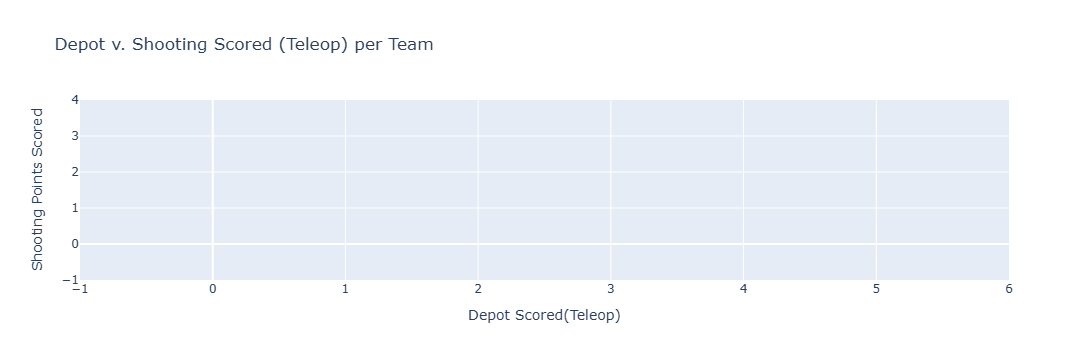

In [21]:
fig = px.scatter(avg, x= "Depot Scored(Teleop)", y= "Shooting Points Scored", text=avg.index, title= "Depot v. Shooting Scored (Teleop) per Team")
fig.update_traces(marker=dict(
    symbol='circle', size=10),
textposition="middle left")
fig.show()

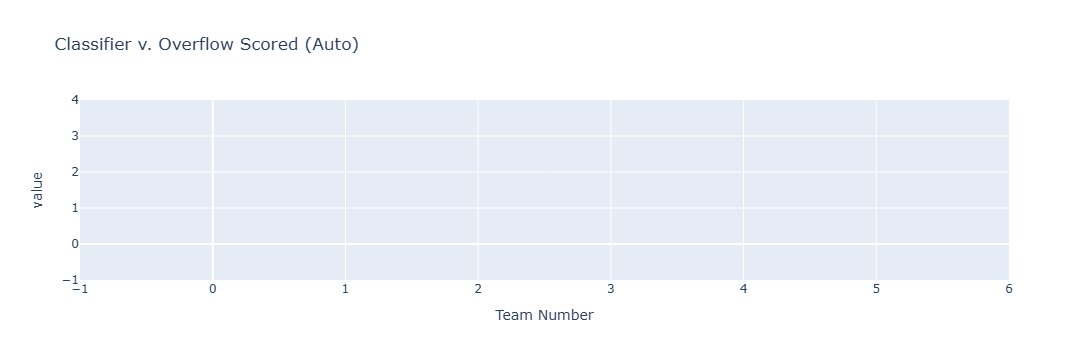

In [22]:
fig = px.bar(avg, y= ["Classifier Scored(Auto)", "Overflow Scored(Auto)"], title="Classifier v. Overflow Scored (Auto)")
fig.show()

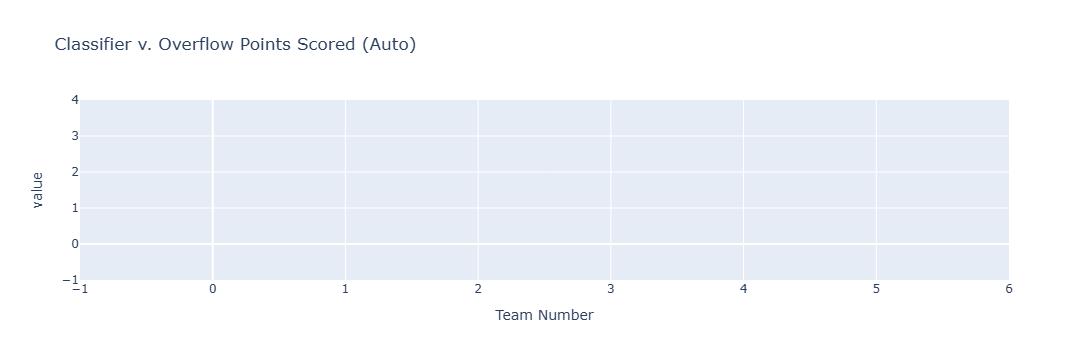

In [23]:
fig = px.bar(avg, y=["Classifier Points Scored(Auto)", "Overflow Points Scored(Auto)"], title="Classifier v. Overflow Points Scored (Auto)")
fig.show()

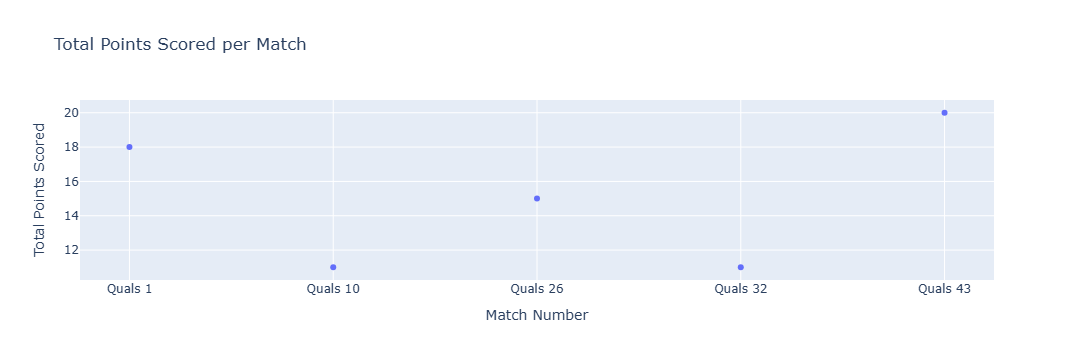

In [34]:
# teams_data = 

xxx = df["Team Number"] == 15206
quals1_data = df[xxx]
quals1_data
fig = px.scatter(quals1_data, x="Match Number", y="Total Points Scored", title="Total Points Scored per Match")
fig.show()